In [1]:
# Plot amazon data transfers:

In [2]:
import pickle
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# pretty dataframe :
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
# Variables:
input_file_name = 'exp_exp_test_id_357.pkl'

In [5]:
with open(input_file_name, 'rb') as f:
    x = pickle.load(f)

In [6]:
df = x[['exp_id', 'transfer_id', 'type', 'file_size','num_files','bandwidth','tcp_bs','rtt','cc','p','pp','throughput','source','destination']]

In [7]:
#df.to_csv('exp_amazon_east_west_cont_1_id_378_fixed.csv')

In [8]:
## 10497940  200000000  782936832

In [9]:
x.head()

,bandwidth,cc,destination,exp_id,file_size,num_files,p,pp,rtt,source,tcp_bs,throughput,transfer_id,type
0,1,10,didclab-ws10.cse.buffalo.edu,exp_test,228593664,10,5,32,0.2,evenstar.cse.buffalo.edu,25600,602.716952,0,I
1,1,15,didclab-ws10.cse.buffalo.edu,exp_test,1677725696,5,5,32,0.2,evenstar.cse.buffalo.edu,25600,473.307436,0,I
2,1,15,didclab-ws10.cse.buffalo.edu,exp_test,228593664,10,5,32,0.2,evenstar.cse.buffalo.edu,25600,328.832673,0,C
3,1,15,didclab-ws10.cse.buffalo.edu,exp_test,1677725696,5,5,32,0.2,evenstar.cse.buffalo.edu,25600,607.836344,0,C
4,1,10,didclab-ws10.cse.buffalo.edu,exp_test,228593664,10,5,32,0.2,evenstar.cse.buffalo.edu,25600,406.491601,1,I


In [10]:
indexed_df = df.set_index(['exp_id','transfer_id','type','file_size'])

In [11]:
#df['file_size'] = df['file_size'].astype(str)
#df['transfer_id'] = df['transfer_id'].astype(str)

In [12]:
small_only_logs = df[(df.file_size < 508593664) & (df.type == 'I')]
small_only_logs = small_only_logs.reset_index()

In [13]:
large_only_logs = df[(df.file_size > 508593664) & (df.type == 'I')]
large_only_logs = large_only_logs.reset_index()

In [17]:
small_combine_logs = df[(df.file_size < 508593664) & (df.type == 'C')]
small_combine_logs = small_combine_logs.reset_index()

In [18]:
large_combine_logs = df[(df.file_size > 508593664) & (df.type == 'C')]
large_combine_logs = large_combine_logs.reset_index()

In [19]:
combined_th_logs = small_combine_logs.throughput + large_combine_logs.throughput


/Users/mds/anaconda/envs/power_env/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


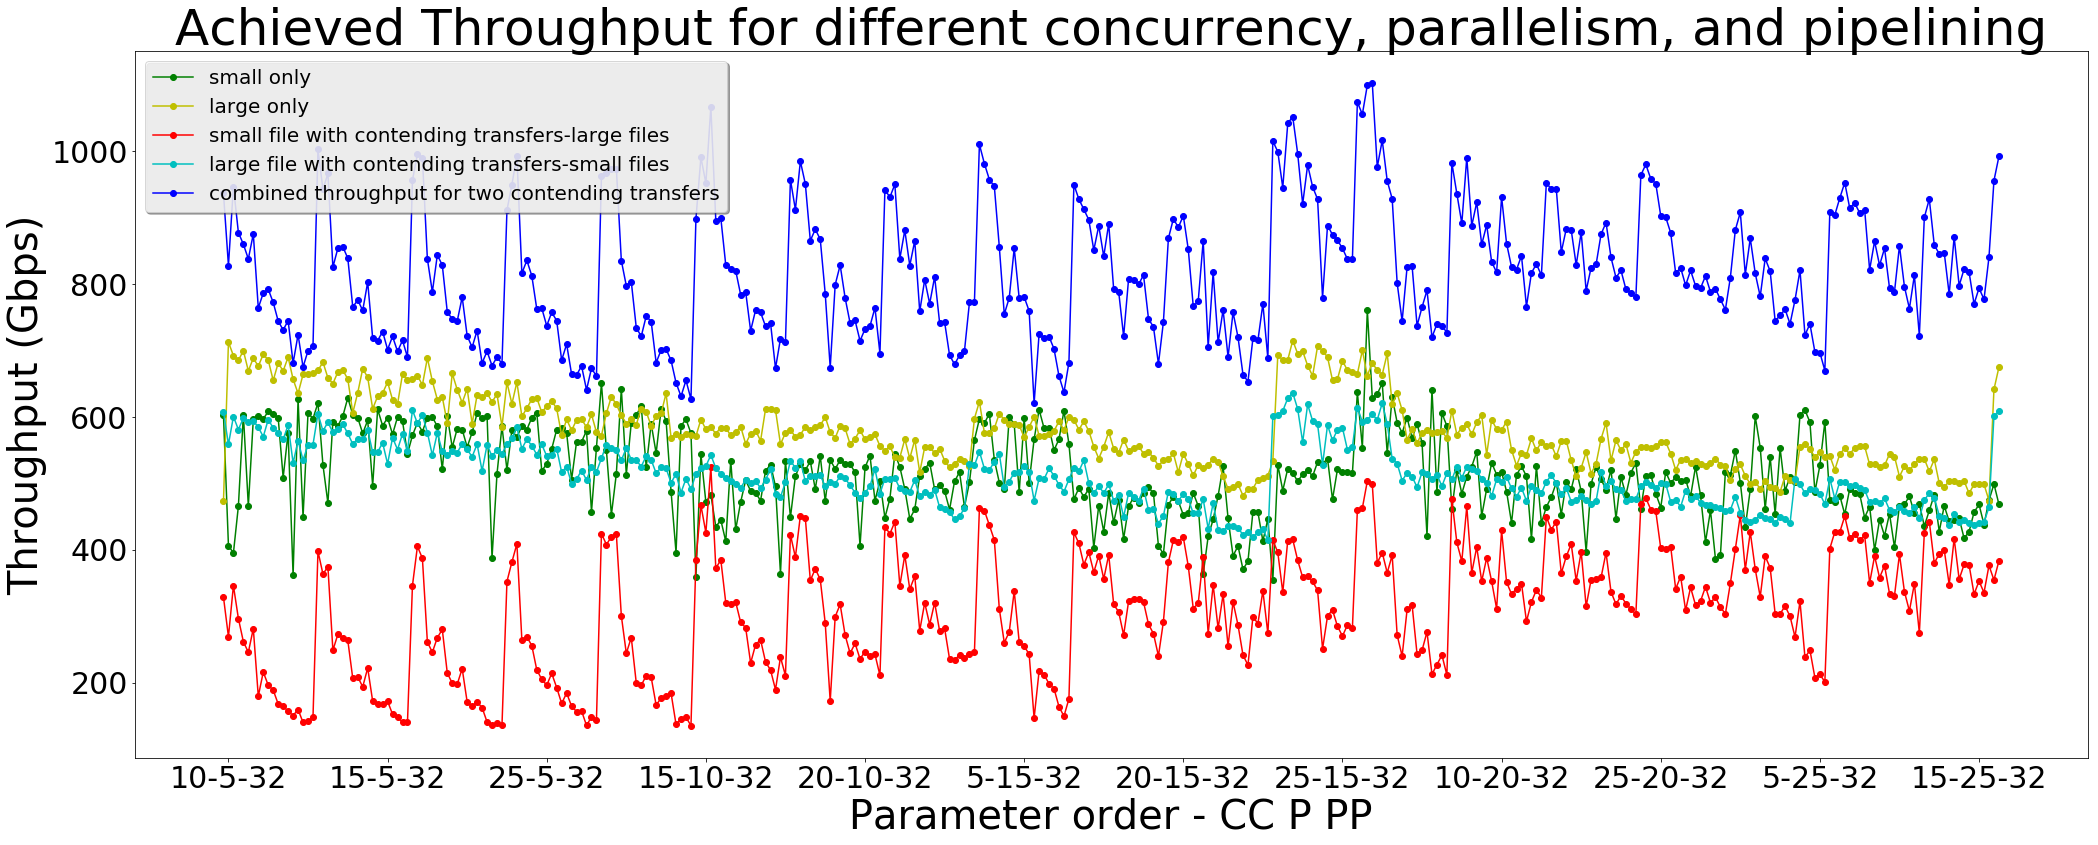

In [21]:
# plot small only logs:
# plot the graph:
small_only_logs['ticks'] = small_only_logs.cc.astype(str) + '-' + small_only_logs.p.astype(str) + '-' + small_only_logs.pp.astype(str)

y_value1 = np.array(small_only_logs.throughput) 
y_value1.shape


# plot small combine:
#small_combine_logs['ticks'] = small_combine_logs.cc.astype(str) + '-' + small_combine_logs.p.astype(str) + '-' + small_only_logs.pp.astype(str)

y_value2 = np.array(small_combine_logs.throughput) 
y_value2.shape

y_value3 = np.array(combined_th_logs)

y_value4 = np.array(large_only_logs.throughput) 
y_value4.shape

y_value5 = np.array(large_combine_logs.throughput) 

x_value = np.arange(1,359)
x_value
tick_value = np.array(small_only_logs.ticks)
plt.figure(figsize=(35,13))
plt.gca().set_color_cycle(['red', 'green','blue'])

plt.xlabel('Parameter order - CC P PP', fontsize=40)
plt.xticks(x_value[1:380:32], tick_value[1:380:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Achieved Throughput for different concurrency, parallelism, and pipelining', fontsize=50)
plt.plot(x_value, y_value1,'-go',label="small only")
plt.plot(x_value, y_value4,'-yo',label="large only")
plt.plot(x_value, y_value2,'-ro', label="small file with contending transfers-large files")
plt.plot(x_value, y_value5,'-co', label="large file with contending transfers-small files")
plt.plot(x_value, y_value3,'-bo', label="combined throughput for two contending transfers")
plt.legend(loc='upper left', shadow=True,fontsize=20)
plt.show()